In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from datetime import datetime
import seaborn as sns

In [3]:
# Dataset okuma 
dataset = pd.read_csv("NetflixOriginals.csv", encoding="ISO-8859-1")

In [4]:
dataset.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


### Soru 1

Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur?
Görselleştirme yapınız.

In [5]:
dataset["Language"].unique()

array(['English/Japanese', 'Spanish', 'Italian', 'English', 'Hindi',
       'Turkish', 'Korean', 'Indonesian', 'Malay', 'Dutch', 'French',
       'English/Spanish', 'Portuguese', 'Filipino', 'German', 'Polish',
       'Norwegian', 'Marathi', 'Thai', 'Swedish', 'Japanese',
       'Spanish/Basque', 'Spanish/Catalan', 'English/Swedish',
       'English/Taiwanese/Mandarin', 'Thia/English', 'English/Mandarin',
       'Georgian', 'Bengali', 'Khmer/English/French', 'English/Hindi',
       'Tamil', 'Spanish/English', 'English/Korean', 'English/Arabic',
       'English/Russian', 'English/Akan', 'English/Ukranian/Russian'],
      dtype=object)

In [6]:
dataset.groupby("Language").count()["Title"]

Language
Bengali                         1
Dutch                           3
English                       401
English/Akan                    1
English/Arabic                  1
English/Hindi                   2
English/Japanese                2
English/Korean                  1
English/Mandarin                2
English/Russian                 1
English/Spanish                 5
English/Swedish                 1
English/Taiwanese/Mandarin      1
English/Ukranian/Russian        1
Filipino                        2
French                         20
Georgian                        1
German                          5
Hindi                          33
Indonesian                      9
Italian                        14
Japanese                        6
Khmer/English/French            1
Korean                          6
Malay                           1
Marathi                         3
Norwegian                       1
Polish                          3
Portuguese                     12
Spani

In [7]:
dataset.groupby("Language").count()["Title"].keys()

Index(['Bengali', 'Dutch', 'English', 'English/Akan', 'English/Arabic',
       'English/Hindi', 'English/Japanese', 'English/Korean',
       'English/Mandarin', 'English/Russian', 'English/Spanish',
       'English/Swedish', 'English/Taiwanese/Mandarin',
       'English/Ukranian/Russian', 'Filipino', 'French', 'Georgian', 'German',
       'Hindi', 'Indonesian', 'Italian', 'Japanese', 'Khmer/English/French',
       'Korean', 'Malay', 'Marathi', 'Norwegian', 'Polish', 'Portuguese',
       'Spanish', 'Spanish/Basque', 'Spanish/Catalan', 'Spanish/English',
       'Swedish', 'Tamil', 'Thai', 'Thia/English', 'Turkish'],
      dtype='object', name='Language')

In [8]:
len(dataset.groupby("Language").count()["Title"]) #38 

dataset.groupby("Language").count()["Title"][0]
dataset.groupby("Language").count()["Title"].values()

TypeError: 'numpy.ndarray' object is not callable

In [9]:
# dataset.groupby("Language").count()["Title"].values()  
# Languages değerlerini values() olarak almaya çalıştığımızda typeError geldiği için değerleri listeye çekiyoruz 

language_values = []
for lang in range(len(dataset.groupby("Language").count()["Title"])):
    language_values.append(dataset.groupby("Language").count()["Title"][lang])

#language_values

Text(0.5, 1.0, 'Uzun soluklu filmlerin oluşturulduğu diller')

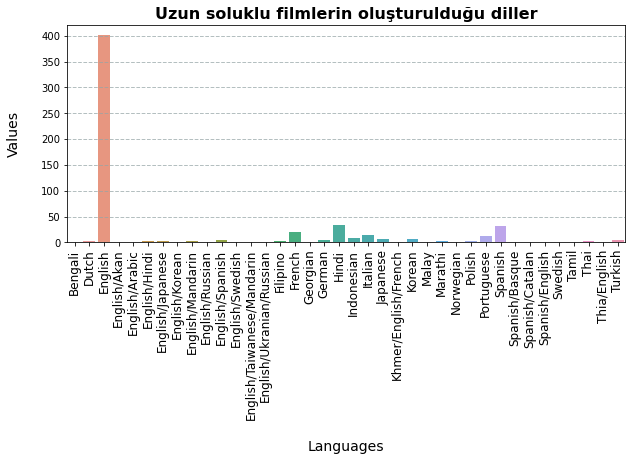

In [10]:
# soru 1 için seaborn çıktısı

plt.figure(figsize = (10,4))
sns.barplot(x = dataset.groupby("Language").count()["Title"].keys(), y= language_values)
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation=90, fontsize = 12)
plt.xlabel("Languages", fontsize = 14 , labelpad = 20)
plt.ylabel("Values", fontsize = 14 , labelpad = 20)
plt.title("Uzun soluklu filmlerin oluşturulduğu diller",
          fontsize= 16,
          fontweight = "bold")

### SORU 2

2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş
filmlerin IMDB değerlerini bulup görselleştiriniz.

In [11]:
type(dataset["Premiere"])

pandas.core.series.Series

In [12]:
# pandas.core.series.Series type'ını datetime'a çevirmek 
dataset["Premiere"] = pd.to_datetime(dataset["Premiere"])

In [13]:
type(dataset["Premiere"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
# Başlangıç ve bitiş tarihlerini datetime ile değişkene atama 

start_date = datetime.strptime("January 1, 2019","%B %d, %Y" )
end_date = datetime.strptime("June 1, 2020","%B %d, %Y" )

In [15]:
# Soru 2 İstenilen veri:

soru2 = dataset[(dataset["Genre"] == "Documentary") & (dataset["Premiere"] > start_date) & (dataset["Premiere"] < end_date)]

In [16]:
soru2

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
15,After the Raid,Documentary,2019-12-19,25,4.3,Spanish
20,"Hello Privilege. It's Me, Chelsea",Documentary,2019-09-13,64,4.4,English
30,After Maria,Documentary,2019-05-24,37,4.6,English/Spanish
111,Ghosts of Sugar Land,Documentary,2019-10-16,21,5.5,English
263,A Tale of Two Kitchens,Documentary,2019-05-22,30,6.3,English/Spanish
286,The Legend of Cocaine Island,Documentary,2019-03-29,87,6.3,English
290,Travis Scott: Look Mom I Can Fly,Documentary,2019-08-28,85,6.3,English
295,Birders,Documentary,2019-09-25,37,6.4,English/Spanish
303,Murder to Mercy: The Cyntoia Brown Story,Documentary,2020-04-29,97,6.4,English


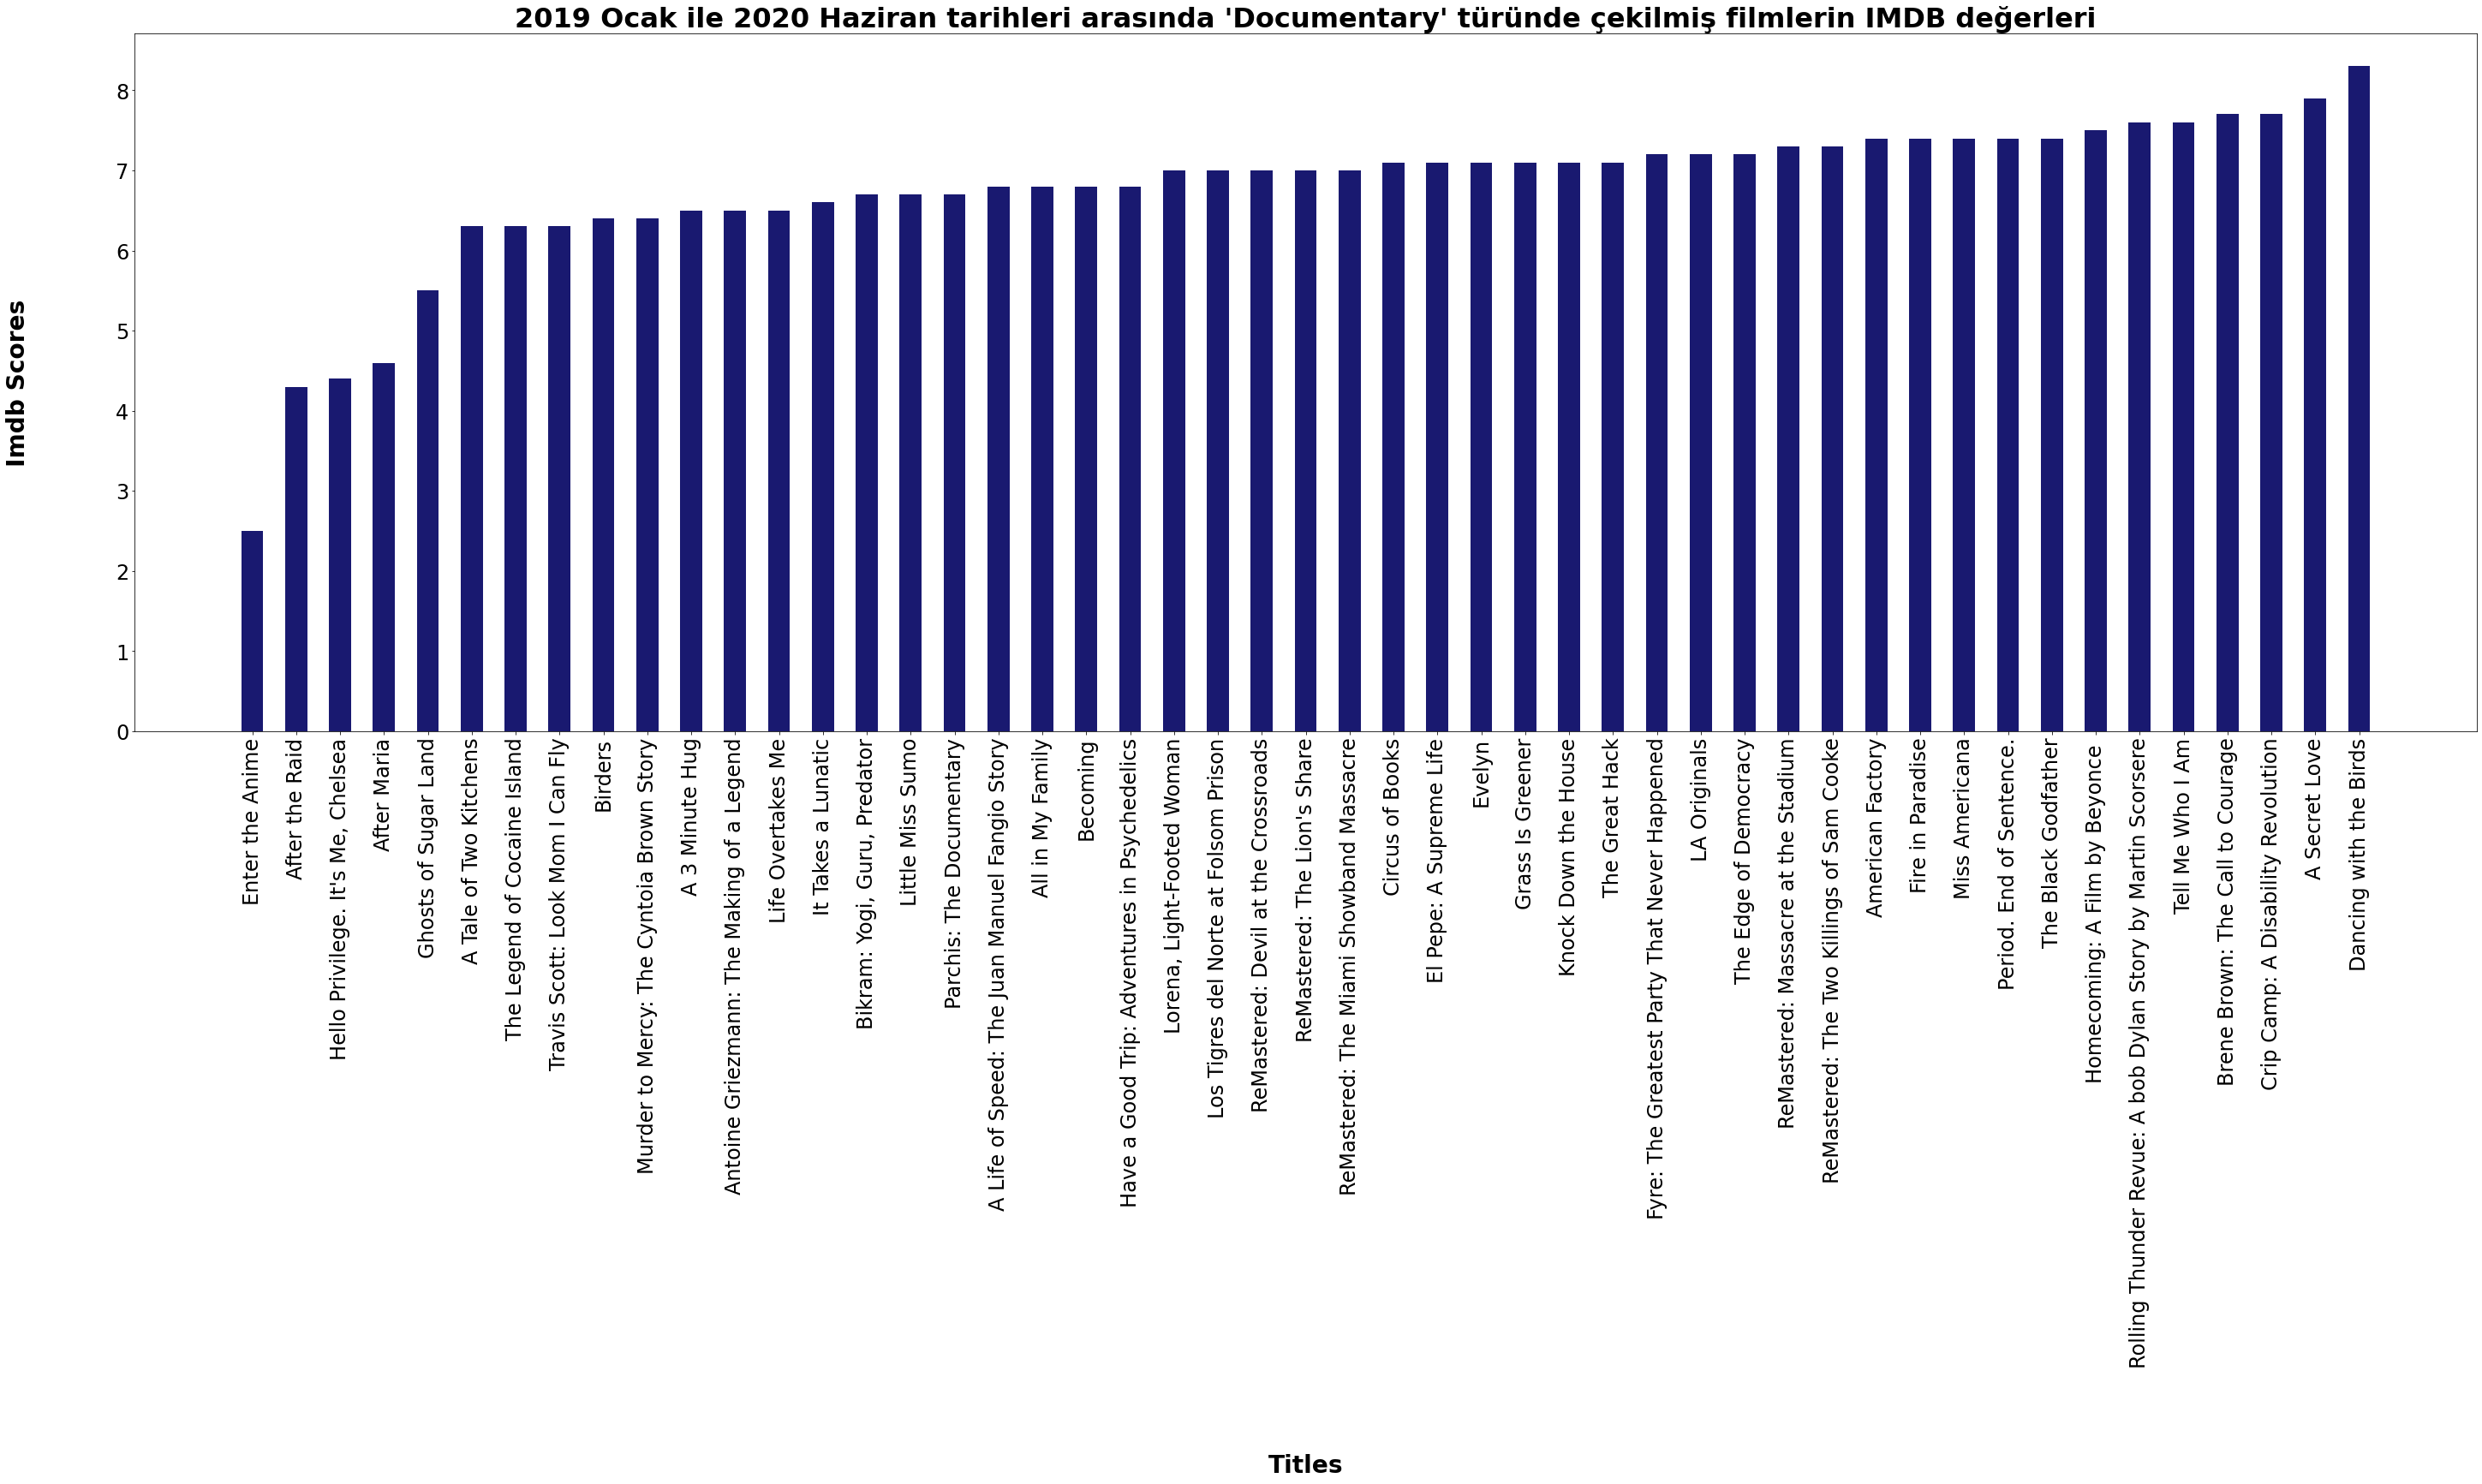

<Figure size 432x288 with 0 Axes>

In [17]:
plt.figure(figsize = (len(soru2["IMDB Score"]),15))
plt.bar(soru2["Title"], soru2["IMDB Score"], color = "midnightblue", width= 0.5)
plt.xticks(rotation = 90, fontsize = 24)
plt.yticks(fontsize = 24)
plt.xlabel("Titles", fontsize = 28, labelpad = 100, fontweight = "bold")
plt.ylabel("Imdb Scores", fontsize = 28, labelpad = 100, fontweight = "bold")
plt.title("2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerleri",
          fontsize= 32,
          fontweight = "bold",)
plt.show()
plt.savefig('proje2.png')

### SORU 3

İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?

In [18]:
ingilizce_filmler = dataset[(dataset["Language"] == "English")]

In [19]:
max_imdb = ingilizce_filmler["IMDB Score"].max()

In [20]:
ingilizce_filmler[(ingilizce_filmler["IMDB Score"] == max_imdb)]["Genre"]

583    Documentary
Name: Genre, dtype: object

### SORU 4

Hindi Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?

In [21]:
hindi_films = dataset[(dataset["Language"] == "Hindi")]

In [22]:
# SONUÇ SORU 4

hindi_films["Runtime"].mean()

115.78787878787878

### SORU 5

'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir?
Görselleştirerek ifade ediniz.

In [23]:
dataset.groupby("Genre")

In [24]:
dataset.groupby("Genre").count()

,Title,Premiere,Runtime,IMDB Score,Language
Genre,,,,,
Action,7,7,7,7,7
Action comedy,5,5,5,5,5
Action thriller,1,1,1,1,1
Action-adventure,1,1,1,1,1
Action-thriller,3,3,3,3,3
...,...,...,...,...,...
War,2,2,2,2,2
War drama,2,2,2,2,2
War-Comedy,1,1,1,1,1


In [25]:
# SONUÇ SORU 5

len(dataset.groupby("Genre"))

115

In [31]:
dataset["Genre"].unique()

array(['Documentary', 'Thriller', 'Science fiction/Drama',
       'Horror thriller', 'Mystery', 'Action', 'Comedy',
       'Heist film/Thriller', 'Musical/Western/Fantasy', 'Drama',
       'Romantic comedy', 'Action comedy', 'Horror anthology',
       'Political thriller', 'Superhero-Comedy', 'Horror',
       'Romance drama', 'Anime / Short', 'Superhero', 'Heist', 'Western',
       'Animation/Superhero', 'Family film', 'Action-thriller',
       'Teen comedy-drama', 'Romantic drama', 'Animation',
       'Aftershow / Interview', 'Christmas musical',
       'Science fiction adventure', 'Science fiction', 'Variety show',
       'Comedy-drama', 'Comedy/Fantasy/Family', 'Supernatural drama',
       'Action/Comedy', 'Action/Science fiction',
       'Romantic teenage drama', 'Comedy / Musical', 'Musical',
       'Science fiction/Mystery', 'Crime drama',
       'Psychological thriller drama', 'Adventure/Comedy', 'Black comedy',
       'Romance', 'Horror comedy', 'Christian musical',
       'Rom

In [35]:
# Hangi genre'den kaç tane var 

dataset["Genre"].value_counts()

Documentary                             159
Drama                                    77
Comedy                                   49
Romantic comedy                          39
Thriller                                 33
                                       ... 
Romantic comedy-drama                     1
Heist film/Thriller                       1
Musical/Western/Fantasy                   1
Horror anthology                          1
Animation/Christmas/Comedy/Adventure      1
Name: Genre, Length: 115, dtype: int64

In [42]:
# genre değerlerini listeye atıyoruz

genre_values = []
for i in range(len(dataset.groupby("Genre"))):
    genre_values.append(dataset["Genre"].value_counts()[i])

#genre_values

Text(0.5, 1.0, "'Genre' Sütunu kaç kategoriye sahiptir?")

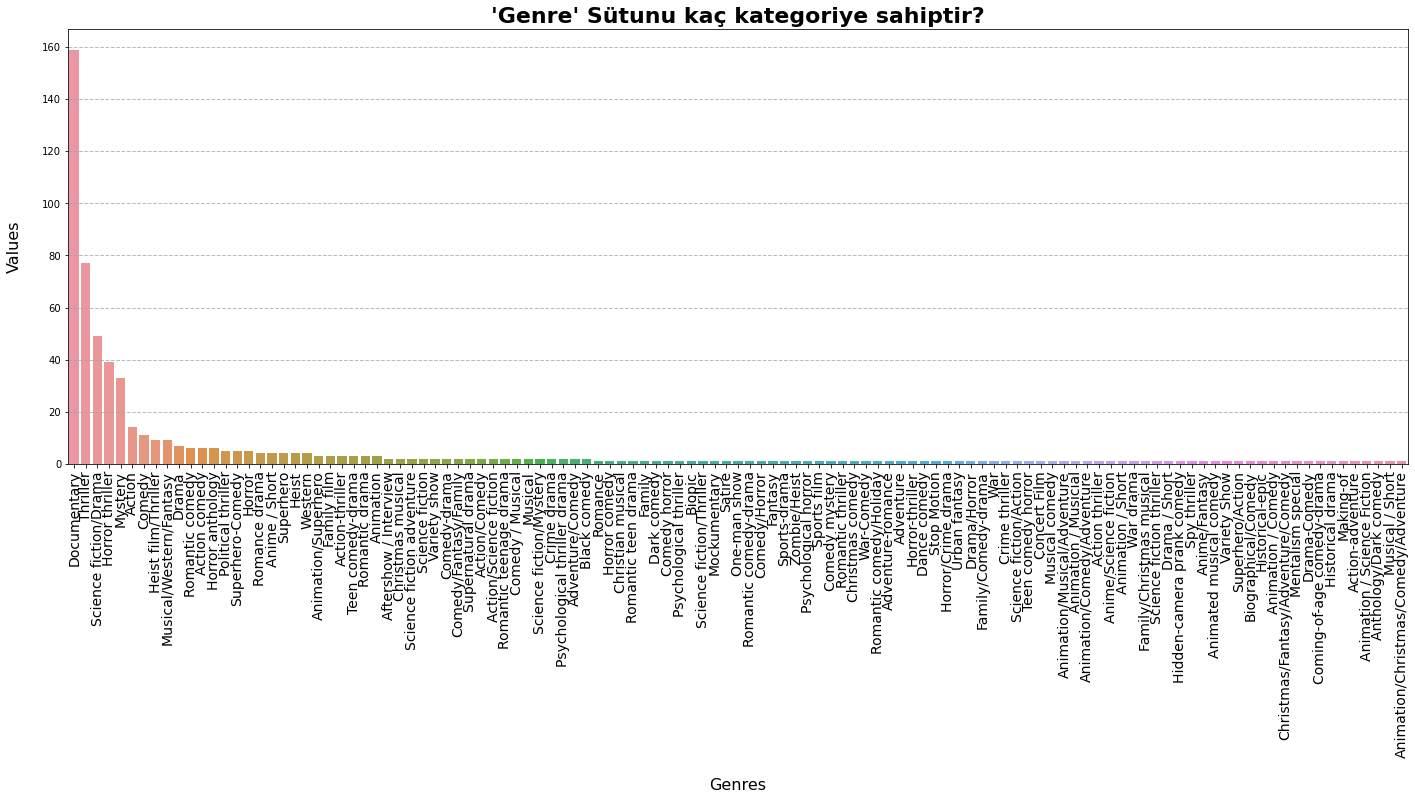

In [57]:
# seaborn ile

plt.figure(figsize = (24,8))
sns.barplot(x = dataset["Genre"].unique(), y= genre_values)
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation=90, fontsize = 14)
plt.xlabel("Genres", fontsize = 16 , labelpad = 20)
plt.ylabel("Values", fontsize = 16 , labelpad = 20)
plt.title("'Genre' Sütunu kaç kategoriye sahiptir?",
          fontsize= 22,
          fontweight = "bold")

### SORU 6

Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.

In [40]:
sorted_languages = dataset.groupby("Language").count()["Title"].sort_values()

In [41]:
# SONUÇ SORU 6

sorted_languages.tail(3)

Language
Spanish     31
Hindi       33
English    401
Name: Title, dtype: int64

### SORU 7

IMDB puanı en yüksek olan ilk 10 film hangileridir?


In [43]:
dataset.sort_index(ascending = False ).head(10)

,Title,Genre,Premiere,Runtime,IMDB Score,Language
583,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.0,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English
578,Ben Platt: Live from Radio City Music Hall,Concert Film,2020-05-20,85,8.4,English
577,Dancing with the Birds,Documentary,2019-10-23,51,8.3,English
576,Cuba and the Cameraman,Documentary,2017-11-24,114,8.3,English
575,The Three Deaths of Marisela Escobedo,Documentary,2020-10-14,109,8.2,Spanish
574,Seaspiracy,Documentary,2021-03-24,89,8.2,English


### SORU 8

IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip
görselleştiriniz.

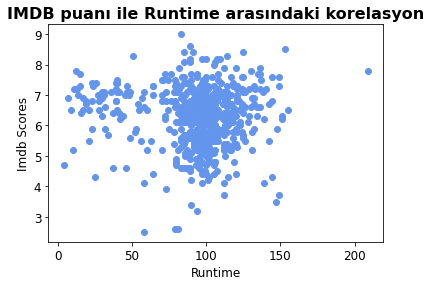

In [45]:
# matplot ile

plt.scatter(dataset["Runtime"], dataset["IMDB Score"], color = "cornflowerblue")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Runtime", fontsize = 12)
plt.ylabel("Imdb Scores", fontsize = 12)
plt.title("IMDB puanı ile Runtime arasındaki korelasyon",
          fontsize= 16,
          fontweight = "bold")
plt.show()

Text(0.5, 1.0, 'IMDB puanı ile Runtime arasındaki korelasyon')

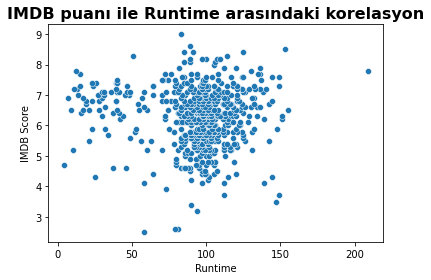

In [46]:
# seaborn ile

sns.scatterplot(data=dataset, x= "Runtime", y= "IMDB Score")
plt.title("IMDB puanı ile Runtime arasındaki korelasyon",
          fontsize= 16,
          fontweight = "bold")

### SORU 9 

IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.

In [48]:
dataset["Genre"]

0                Documentary
1                   Thriller
2      Science fiction/Drama
3            Horror thriller
4                    Mystery
               ...          
579             Concert Film
580              Documentary
581             One-man show
582              Documentary
583              Documentary
Name: Genre, Length: 584, dtype: object

In [49]:
# IMDB Puanı en yüksek olan ilk 10 'Genre'
dataset.sort_index(ascending = False ).head(10)["Genre"]

583     Documentary
582     Documentary
581    One-man show
580     Documentary
579    Concert Film
578    Concert Film
577     Documentary
576     Documentary
575     Documentary
574     Documentary
Name: Genre, dtype: object

In [50]:
top10_genre = dataset.sort_index(ascending = False ).head(10)["Genre"]

{'Documentary': 7, 'Concert Film': 2, 'One-man show': 1}


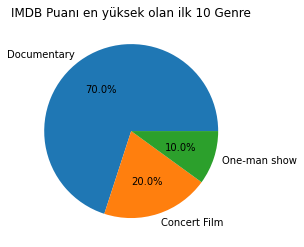

In [51]:
top10_genre_dict = dict(top10_genre.value_counts())

print(top10_genre_dict)

plt.pie(top10_genre_dict.values(), labels = top10_genre_dict.keys(), autopct='%1.1f%%')
plt.title("IMDB Puanı en yüksek olan ilk 10 Genre")
plt.show()

### SORU 10

'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.

In [53]:
top10_runtime = dataset["Runtime"].sort_values(ascending = False).head(10)
top10_runtime = dict(top10_runtime)

In [54]:
top10_runtime_titles = list()
top10_runtime_values = list()
for value in top10_runtime.values():
    for j in range(len(dataset)):
        if value == dataset["Runtime"][j]:
            top10_runtime_titles.append(dataset["Title"][j])
            top10_runtime_values.append(dataset["Runtime"][j])

top10_runtime_titles

['The Irishman',
 'Da 5 Bloods',
 'Springsteen on Broadway',
 'Citation',
 'The Forest of Love',
 'Citation',
 'The Forest of Love',
 'The Last Days of American Crime',
 'Raat Akeli Hai',
 'Ludo',
 'The Last Days of American Crime',
 'Raat Akeli Hai',
 'Ludo',
 'The Last Days of American Crime',
 'Raat Akeli Hai',
 'Ludo',
 'Army of the Dead',
 'Drive']

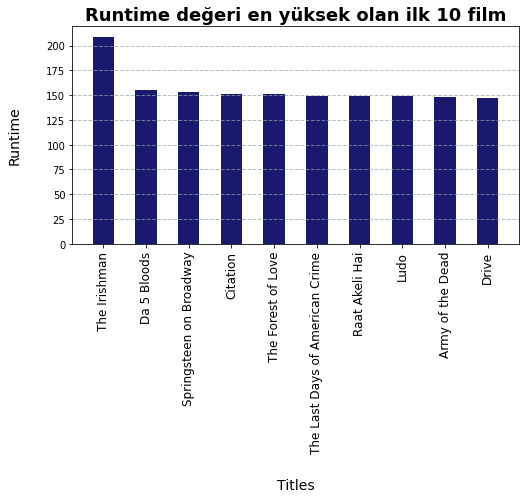

In [55]:
# matplotlib ile 

plt.figure(figsize = (8,4))
plt.bar(top10_runtime_titles,top10_runtime_values, color = "midnightblue", width= 0.5)
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation = 90, fontsize = 12)
plt.xlabel("Titles", fontsize = 14 , labelpad = 25)
plt.ylabel("Runtime", fontsize = 14 , labelpad = 25)
plt.title("Runtime değeri en yüksek olan ilk 10 film",
          fontsize= 18,
          fontweight = "bold")
plt.show()

Text(0.5, 1.0, 'Runtime değeri en yüksek olan ilk 10 film')

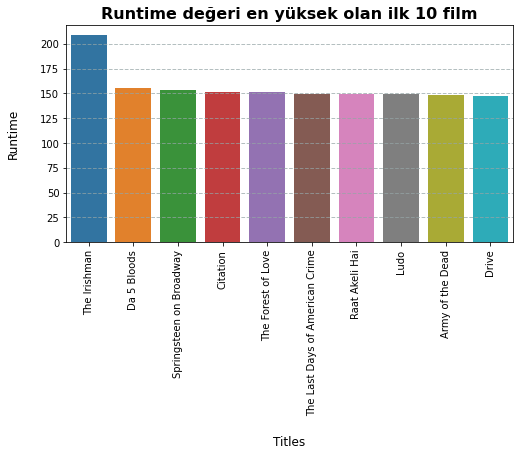

In [56]:
# seaborn ile

plt.figure(figsize = (8,4))
sns.barplot(x = top10_runtime_titles, y= top10_runtime_values)
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation=90)
plt.xlabel("Titles", fontsize = 12 , labelpad = 20)
plt.ylabel("Runtime", fontsize = 12 , labelpad = 20)
plt.title("Runtime değeri en yüksek olan ilk 10 film",
          fontsize= 16,
          fontweight = "bold")

### SORU 11

Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.

In [58]:
type(dataset["Premiere"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [59]:
year2019 = datetime.strptime("2019", "%Y" )
year2020 = datetime.strptime("2020", "%Y" )
year2021 = datetime.strptime("2021", "%Y" )  

In [60]:
# 2019 yılında yayınlanan filmlerin filtrelenmesi

dataset[(dataset["Premiere"].dt.year == year2019.year )]

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian
5,Drive,Action,2019-11-01,147,3.5,Hindi
15,After the Raid,Documentary,2019-12-19,25,4.3,Spanish
20,"Hello Privilege. It's Me, Chelsea",Documentary,2019-09-13,64,4.4,English
...,...,...,...,...,...,...
554,Brene Brown: The Call to Courage,Documentary,2019-04-19,76,7.7,English
561,The Irishman,Crime drama,2019-11-27,209,7.8,English
565,Marriage Story,Drama,2019-12-06,136,7.9,English
573,Klaus,Animation/Christmas/Comedy/Adventure,2019-11-15,97,8.2,English


In [61]:
# 2019 yılında yayınlanan toplam film sayısı

dataset[(dataset["Premiere"].dt.year == year2019.year )].count()["Title"]
# 125

125

In [62]:
total_movie2019 = dataset[(dataset["Premiere"].dt.year == year2019.year )].count()["Title"]
total_movie2020 = dataset[(dataset["Premiere"].dt.year == year2020.year )].count()["Title"]
total_movie2021 = dataset[(dataset["Premiere"].dt.year == year2021.year )].count()["Title"]

In [63]:
# Görselleştirmeyi kolaylaştırmak için keys ve values değerlerini dictionary'e atandı

number_of_movies = {
    "2019" : total_movie2019,
    "2020" : total_movie2020,
    "2021" : total_movie2021
}

number_of_movies

{'2019': 125, '2020': 183, '2021': 71}

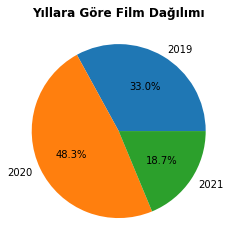

In [64]:
# Datasetin yıllara göre film dağılımını gösteren pie chart çıktısı

plt.pie(number_of_movies.values(), labels = number_of_movies.keys(), autopct='%1.1f%%')
plt.title("Yıllara Göre Film Dağılımı", fontweight = "bold")
plt.show()

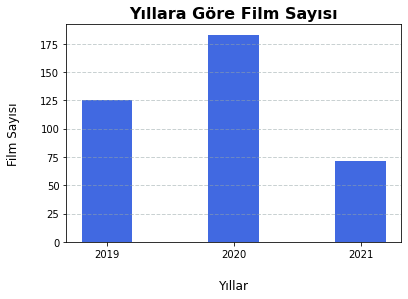

In [65]:
# Datasetin yıllara göre film sayısını gösteren bar plot

plt.bar(number_of_movies.keys(), number_of_movies.values() ,  color = "royalblue", width = 0.4)
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.xlabel("Yıllar", fontsize = 12 , labelpad = 20)
plt.ylabel("Film Sayısı", fontsize = 12 , labelpad = 20)
plt.title("Yıllara Göre Film Sayısı",
          fontsize= 16,
          fontweight = "bold",)
plt.show()

### SORU 12

Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir?
Görselleştiriniz.

In [67]:
dataset["Language"].unique()[0]

'English/Japanese'

In [68]:
dataset[(dataset["Language"] == dataset["Language"].unique()[0])]

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
287,The Outsider,Crime drama,2018-03-09,120,6.3,English/Japanese


In [69]:
# 0. indexteki dilin imdb scorelarını filtreleme

dataset[(dataset["Language"] == dataset["Language"].unique()[0])]["IMDB Score"]

0      2.5
287    6.3
Name: IMDB Score, dtype: float64

In [70]:
# 0. indexteki dilin imdb ortalaması

dataset[(dataset["Language"] == dataset["Language"].unique()[0])]["IMDB Score"].mean()

4.4

In [71]:
# Türkçe filmler

dataset[(dataset["Language"] == dataset["Language"].unique()[5])]

,Title,Genre,Premiere,Runtime,IMDB Score,Language
6,Leyla Everlasting,Comedy,2020-12-04,112,3.7,Turkish
132,One-Way to Tomorrow,Romance,2020-06-19,90,5.6,Turkish
235,Stuck Apart,Drama,2021-01-08,96,6.1,Turkish
249,Have You Ever Seen Fireflies?,Comedy,2021-04-09,114,6.2,Turkish
383,Paper Lives,Drama,2021-03-12,97,6.7,Turkish


In [72]:
# Türkçe filmlerin imdb ortalaması 

dataset[(dataset["Language"] == dataset["Language"].unique()[5])]["IMDB Score"].mean()

5.66

In [73]:
# tüm imdb ortalamalarını listeye atıyoruz

imdb_means = []

for i in range(len(dataset["Language"].unique())):
    imdb_mean = dataset[(dataset["Language"] == dataset["Language"].unique()[i])]["IMDB Score"].mean()
    imdb_means.append(imdb_mean)
    
#imdb_means

In [74]:
# dil ve imdb ortalamalarını dict atıyoruz

imdb_means_langs = dict(zip(dataset["Language"].unique(), imdb_means))

Text(0.5, 1.0, 'Dillere göre IMDB ortalamaları')

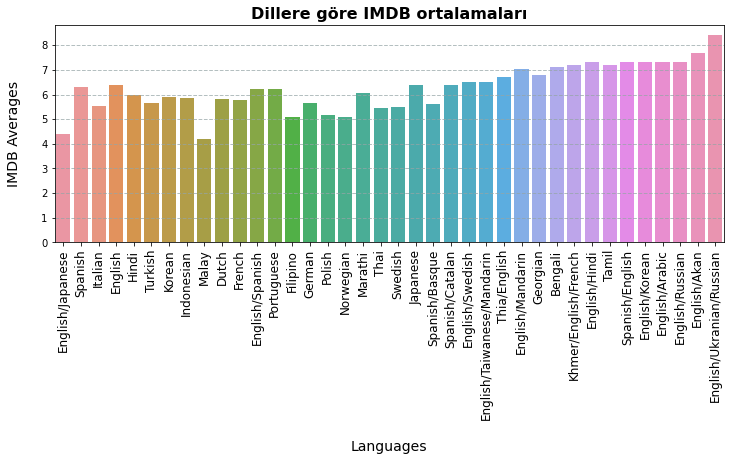

In [75]:
# seaborn çıktısı 

plt.figure(figsize = (12,4))
sns.barplot(x = dataset["Language"].unique(), y = imdb_means )
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation=90, fontsize = 12)
plt.xlabel("Languages", fontsize = 14 , labelpad = 20)
plt.ylabel("IMDB Averages", fontsize = 14 , labelpad = 20)
plt.title("Dillere göre IMDB ortalamaları",
          fontsize= 16,
          fontweight = "bold")

In [76]:
# en düşük imdb ort. sahip dili bulmak için;

# minimum imdb ortalamasını buluyoruz
min_imdb_avr = min(imdb_means)  # 4.2

# min imdb ort. indexini buluyoruz 
imdb_means.index(min_imdb_avr) # 8
min_imdb_index = imdb_means.index(min_imdb_avr)

In [77]:
# IMDB ortalaması en düşük dil 

print(f"""
IMDB ortalaması en düşük olan dil; {dataset["Language"].unique()[min_imdb_index]} dilidir.
IMDB ortalaması {min_imdb_avr}'dır.
""")


IMDB ortalaması en düşük olan dil; Malay dilidir.
IMDB ortalaması 4.2'dır.



In [78]:
# IMDB ortalaması en düşük 10 dili bulmak için;

imdb_means.sort()
#imdb_means 

print("IMDB ortalaması en düşük olan 10 dil")
for i in range(10):
    for key, value in imdb_means_langs.items():
        if imdb_means[i] == value:
            print(f'Dil: {key}, IMDB Puanı: {value}')

IMDB ortalaması en düşük olan 10 dil
Dil: Malay, IMDB Puanı: 4.2
Dil: English/Japanese, IMDB Puanı: 4.4
Dil: Filipino, IMDB Puanı: 5.1
Dil: Norwegian, IMDB Puanı: 5.1
Dil: Filipino, IMDB Puanı: 5.1
Dil: Norwegian, IMDB Puanı: 5.1
Dil: Polish, IMDB Puanı: 5.166666666666667
Dil: Thai, IMDB Puanı: 5.45
Dil: Swedish, IMDB Puanı: 5.5
Dil: Italian, IMDB Puanı: 5.542857142857144
Dil: Spanish/Basque, IMDB Puanı: 5.6
Dil: German, IMDB Puanı: 5.640000000000001


### SORU 13

Hangi yılın toplam "runtime" süresi en fazladır?

In [58]:
# 2019 yılındaki toplam runtime süresi
total_runtime2019 = dataset[(dataset["Premiere"].dt.year == year2019.year )].sum()["Runtime"]

# 2020 yılındaki toplam runtime süresi
total_runtime2020 = dataset[(dataset["Premiere"].dt.year == year2020.year )].sum()["Runtime"]

# 2021 yılındaki toplam runtime süresi
total_runtime2021 = dataset[(dataset["Premiere"].dt.year == year2021.year )].sum()["Runtime"]

C:\Users\pc\AppData\Local\Temp/ipykernel_19016/2632721147.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  total_runtime2019 = dataset[(dataset["Premiere"].dt.year == year2019.year )].sum()["Runtime"]
C:\Users\pc\AppData\Local\Temp/ipykernel_19016/2632721147.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  total_runtime2020 = dataset[(dataset["Premiere"].dt.year == year2020.year )].sum()["Runtime"]
C:\Users\pc\AppData\Local\Temp/ipykernel_19016/2632721147.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns befo

In [59]:
total_runtime = {
    "2019" : total_runtime2019,
    "2020" : total_runtime2020,
    "2021" : total_runtime2021
}

total_runtime

{'2019': 10856, '2020': 17384, '2021': 7214}

In [60]:
# hangi yılın toplam runtime süresi daha fazladır 

for key, value in total_runtime.items():
    max_runtime = max(total_runtime.values()) # max runtime'ı hesaplar
    if value == max_runtime:
        print(f"""
        En yüksek runtime süresine sahip yıl {key} yılıdır,
        Runtime süresi: {max_runtime}""")


        En yüksek runtime süresine sahip yıl 2020 yılıdır,
        Runtime süresi: 17384


### SORU 14 

Her bir dilin en fazla kullanıldığı "Genre" nedir?

In [79]:
# 4. indexte bulunan dilin "Genre" değerleri

dataset[(dataset["Language"] == dataset["Language"].unique()[4])]["Genre"].value_counts()

Drama                    13
Thriller                  5
Comedy                    4
Romantic comedy           3
Comedy-drama              2
Mystery                   1
Action                    1
Horror anthology          1
Horror                    1
Crime drama               1
Anthology/Dark comedy     1
Name: Genre, dtype: int64

In [80]:
# en fazla değere sahip "Genre"

dataset[(dataset["Language"] == dataset["Language"].unique()[4])]["Genre"].value_counts().keys()[0]

'Drama'

In [84]:
# bütün diller için en fazla kullanılan "Genre"ler

most_genres = list()
for i in range(len(dataset["Language"].unique())):
    most_genres.append(dataset[(dataset["Language"] == dataset["Language"].unique()[i])]["Genre"].value_counts().keys()[0])

In [90]:
# deneme 

dataset["Language"].unique()[2] # italian

dataset[(dataset["Language"] == dataset["Language"].unique()[2])]["Genre"] # en fazla bulunan genre 'drama'

2       Science fiction/Drama
29                     Comedy
35                     Comedy
41                      Drama
82                      Drama
106    Romantic teenage drama
135            Romantic drama
142       Romantic teen drama
206               Sports film
208                     Drama
245                    Biopic
408                     Drama
447                    Comedy
508               Crime drama
Name: Genre, dtype: object

Text(0.5, 1.0, 'Her bir dilin en fazla kullanıldığı Genre')

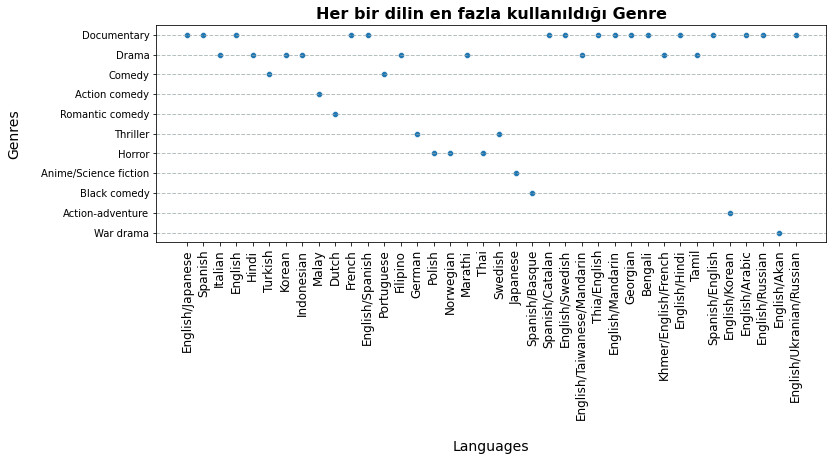

In [85]:
# seaborn çıktısı 

plt.figure(figsize = (12,4))
sns.scatterplot(x = dataset["Language"].unique(), y = most_genres )
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation=90, fontsize = 12)
plt.xlabel("Languages", fontsize = 14 , labelpad = 20)
plt.ylabel("Genres", fontsize = 14 , labelpad = 20)
plt.title("Her bir dilin en fazla kullanıldığı Genre",
          fontsize= 16,
          fontweight = "bold")

### SORU 15 

 Veri setinde outlier veri var mıdır? Açıklayınız.

In [92]:
"""
Aykırı değerler ortalamadan negatif veya pozitif yönde üç veya daha fazla standart sapma 
uzaklıktadır (diğer adıyla 3 sigma)" ilkesini ele alarak tüm imdb değerlerinin z-skorunu hesaplayarak 
ayrıkı değerin tespitini yapabiliriz.
"""

'\nAykırı değerler ortalamadan negatif veya pozitif yönde üç veya daha fazla standart sapma \nuzaklıktadır (diğer adıyla 3 sigma)" ilkesini ele alarak tüm imdb değerlerinin z-skorunu hesaplayarak \nayrıkı değerin tespitini yapabiliriz.\n'

In [93]:
"""
Z skoru,

Z = (data - mean) / (standart sapma)

formülü ile bulunur.

"""

'\nZ skoru,\n\nZ = (data - mean) / (standart sapma)\n\nformülü ile bulunur.\n\n'

In [94]:
# 0. indeks için imdb değeri

dataset["IMDB Score"][0]

2.5

In [95]:
# IMDB Score ortalaması

dataset["IMDB Score"].mean()

6.2717465753424655

In [96]:
# IMDB Score standart sapması

dataset["IMDB Score"].std()

0.9792563938488795

In [97]:
# Z score'ları listeye atıyoruz.

Z_score = list()

for i in range(len(dataset["IMDB Score"])):
    Z_score.append((dataset["IMDB Score"][i] - dataset["IMDB Score"].mean()) / (dataset["IMDB Score"].std()))

In [98]:
# 3 sigma ilkesinden yola çıkarak mutlak değeri 3 değerinden büyük olan verileri outliner olarak kabul edebiliriz.

Z_score_index = list()

for i in range(len(Z_score)):
    if abs(Z_score[i]) >= 3:
        Z_score_index.append(i)

In [99]:
Z_score_index

[0, 1, 2, 3]

In [100]:
print("Outlier IMDB Değerleri: ")

for j in range(len(Z_score_index)):
    print(dataset["IMDB Score"][Z_score_index[j]])

Outlier IMDB Değerleri: 
2.5
2.6
2.6
3.2
